https://mp.weixin.qq.com/s?__biz=MzI0OTQyNzEzMQ==&mid=2247487864&idx=2&sn=bad5b1d394f3212db4e7f82af5003752&chksm=e990f4acdee77dba1bb8f5303255cc88cf2c58f48d94e15dfac3cbcd12ac2f9873b6760c322f&mpshare=1&scene=1&srcid=1107zIresO9PNNQZGVpzRV0r#rd

## 1、数据介绍

再介绍本篇的内容之前，我们先来看一下本文用到的数据。本文用到的中国银行股票数据下载：http://pan.baidu.com/s/1gfxRFbH，提取码d3id。

我们先来导入一下我们的数据，顺便画出收盘价数据的折线图：

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
ChinaBank = pd.read_csv('ChinaBank.csv',index_col = 'Date',parse_dates=['Date']).iloc[:,1:]
ChinaBank.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,2.62,2.62,2.59,2.61,41632500
2014-01-03,2.60,2.61,2.56,2.56,45517700
2014-01-06,2.57,2.57,2.50,2.53,68674700
2014-01-07,2.51,2.52,2.49,2.52,53293800
2014-01-08,2.51,2.54,2.49,2.51,69087900


In [27]:
sub = ChinaBank['2014-01':'2014-06']['Close']
sub

Date
2014-01-02    2.61
2014-01-03    2.56
2014-01-06    2.53
2014-01-07    2.52
2014-01-08    2.51
2014-01-09    2.50
2014-01-10    2.49
2014-01-13    2.52
2014-01-14    2.51
2014-01-15    2.51
2014-01-16    2.50
2014-01-17    2.48
2014-01-20    2.47
2014-01-21    2.47
2014-01-22    2.51
2014-01-23    2.48
2014-01-24    2.49
2014-01-27    2.48
2014-01-28    2.49
2014-01-29    2.53
2014-01-30    2.51
2014-01-31    2.51
2014-02-03    2.51
2014-02-05    2.51
2014-02-06    2.51
2014-02-07    2.49
2014-02-10    2.51
2014-02-11    2.55
2014-02-12    2.54
2014-02-13    2.55
              ... 
2014-05-20    2.65
2014-05-21    2.66
2014-05-22    2.67
2014-05-23    2.68
2014-05-26    2.69
2014-05-27    2.68
2014-05-28    2.69
2014-05-29    2.69
2014-05-30    2.67
2014-06-02    2.67
2014-06-03    2.72
2014-06-04    2.72
2014-06-05    2.73
2014-06-06    2.70
2014-06-09    2.72
2014-06-10    2.74
2014-06-11    2.74
2014-06-12    2.76
2014-06-13    2.80
2014-06-16    2.81
2014-06-17    2.78
2014-06

In [10]:
train = sub.loc['2014-01':'2014-03']
test = sub.loc['2014-04':'2014-06']

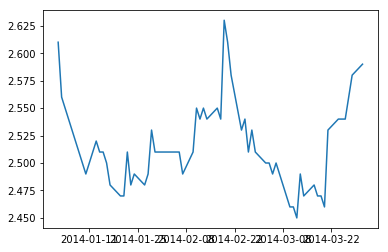

In [11]:
plt.plot(train)

## 2、时间序列平稳性

### 2.1 平稳性

平稳性就是要求经由样本时间序列所得到的拟合曲线在未来一段时间内仍能顺着现有的形态惯性地延续下去。平稳性要求序列的均值和方差不发生明显变化。

#### 严平稳
严平稳表示的分布不随时间的改变而改变。如白噪声(正太),无论怎么取，都是期望为0，方差为1

#### 宽平稳
期望与相关系数(依赖性)不变。未来某时刻的t的值Xt就要依赖于它的过去信息，所以需要依赖性。这种依赖性不能有明显的变化。

### 2.2 差分法

使用差分法可以使得数据更平稳，常用的方法就是一阶差分法和二阶差分法。

时间序列差分值的求解可以直接通过pandas中的diff函数得到：

In [12]:
ChinaBank['Close_diff_1'] = ChinaBank['Close'].diff(1)
ChinaBank['Close_diff_2'] = ChinaBank['Close_diff_1'].diff(1)
ChinaBank.head()

,Open,High,Low,Close,Volume,Close_diff_1,Close_diff_2
Date,,,,,,,
2014-01-02,2.62,2.62,2.59,2.61,41632500,NaN,NaN
2014-01-03,2.60,2.61,2.56,2.56,45517700,-0.05,NaN
2014-01-06,2.57,2.57,2.50,2.53,68674700,-0.03,2.000000e-02
2014-01-07,2.51,2.52,2.49,2.52,53293800,-0.01,2.000000e-02
2014-01-08,2.51,2.54,2.49,2.51,69087900,-0.01,-4.440892e-16


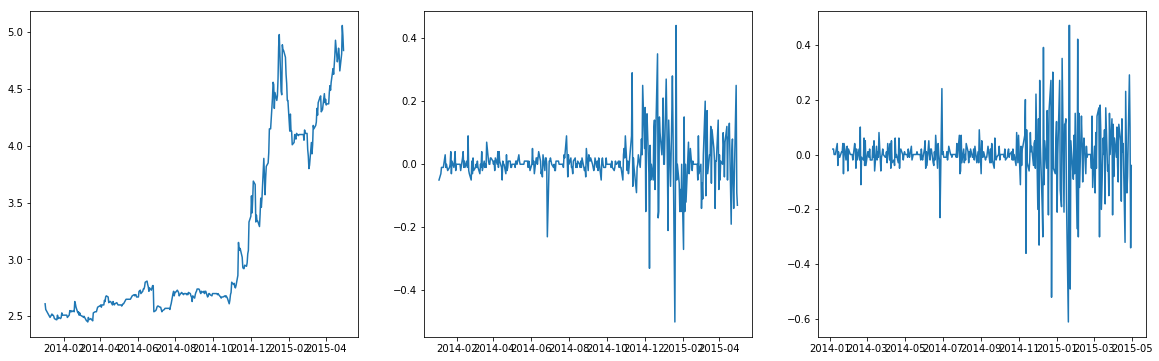

In [13]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(ChinaBank['Close'])
ax2 = fig.add_subplot(132)
ax2.plot(ChinaBank['Close_diff_1'])
ax3 = fig.add_subplot(133)
ax3.plot(ChinaBank['Close_diff_2'])
plt.show()

#### 可以看到，基本上时间序列在一阶差分的时候就已经接近于平稳序列了。

## 3、ARIMA模型介绍

### 3.1 自回归模型AR

自回归模型描述当前值与历史值之间的关系，用变量自身的历史时间数据对自身进行预测。自回归模型必须满足平稳性的要求。

自回归模型首先需要确定一个阶数p，表示用几期的历史值来预测当前值。p阶自回归模型的公式定义为：  
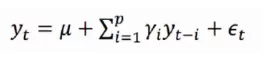  
上式中yt是当前值,u是常数项,p是阶数 ri是自相关系数,et是误差。

自回归模型有很多的限制：  
1、自回归模型是用自身的数据进行预测  
2、时间序列数据必须具有平稳性  
3、自回归只适用于预测与自身前期相关的现象

### 3.2 移动平均模型MA

移动平均模型关注的是自回归模型中的误差项的累加 ，q阶自回归过程的公式定义如下：  
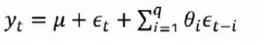  
移动平均法能有效地消除预测中的随机波动。

### 3.3 自回归移动平均模型ARMA

自回归模型AR和移动平均模型MA模型相结合，我们就得到了自回归移动平均模型ARMA(p,q)，计算公式如下：  
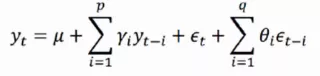

### 3.4 差分自回归移动平均模型ARIMA

将自回归模型、移动平均模型和差分法结合，我们就得到了差分自回归移动平均模型ARIMA(p,d,q)，其中d是需要对数据进行差分的阶数。

## 4、建立ARIMA模型的过程

一般来说，建立ARIMA模型一般有三个阶段，分别是模型识别和定阶、参数估计和模型检验，接下来，我们一步步来介绍：

### 4.1 模型识别和定阶

模型的识别问题和定阶问题，主要是确定p，d，q三个参数，差分的阶数d一般通过观察图示，1阶或2阶即可。这里我们主要介绍p和q的确定。我们首先介绍两个函数。

#### 自相关函数ACF(autocorrelation function)
自相关函数ACF描述的是时间序列观测值与其过去的观测值之间的线性相关性。计算公式如下：  
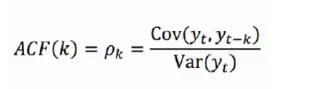
其中k代表滞后期数，如果k=2，则代表yt和yt-2

#### 偏自相关函数PACF(partial autocorrelation function)
偏自相关函数PACF描述的是在给定中间观测值的条件下，时间序列观测值与其过去的观测值之间的线性相关性。

举个简单的例子，假设k=3，那么我们描述的是yt和yt-3之间的相关性，但是这个相关性还受到yt-1和yt-2的影响。PACF剔除了这个影响，而ACF包含这个影响。

#### 拖尾和截尾
拖尾指序列以指数率单调递减或震荡衰减，  
而截尾指序列从某个时点变得非常小：  
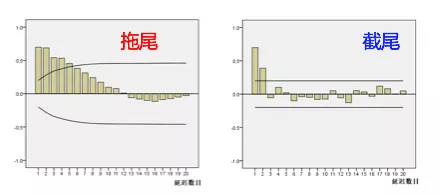

#### 出现以下情况，通常视为(偏)自相关系数d阶截尾：  
1）在最初的d阶明显大于2倍标准差范围  
2）之后几乎95%的(偏)自相关系数都落在2倍标准差范围以内  
3）且由非零自相关系数衰减为在零附近小值波动的过程非常突然  
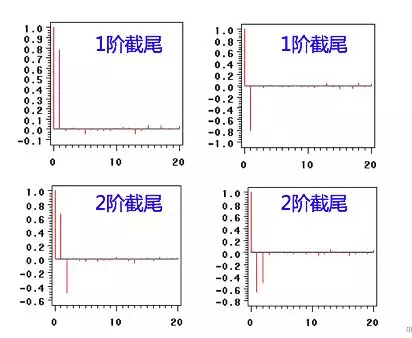

#### 出现以下情况，通常视为(偏)自相关系数拖尾：   
1）如果有超过5%的样本(偏)自相关系数都落入2倍标准差范围之外  
2）或者是由显著非0的(偏)自相关系数衰减为小值波动的过程比较缓慢或非常连续。  
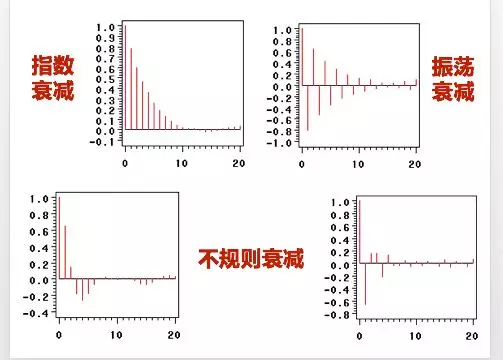

#### p，q阶数的确定
根据刚才判定截尾和拖尾的准则，p，q的确定基于如下的规则：  
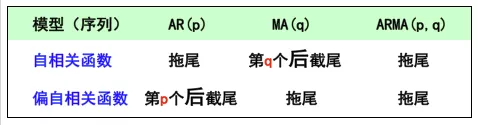

根据不同的截尾和拖尾的情况，我们可以选择AR模型，也可以选择MA模型，当然也可以选择ARIMA模型。  

接下来，我们就来画一下我们数据的拖尾和截尾情况:

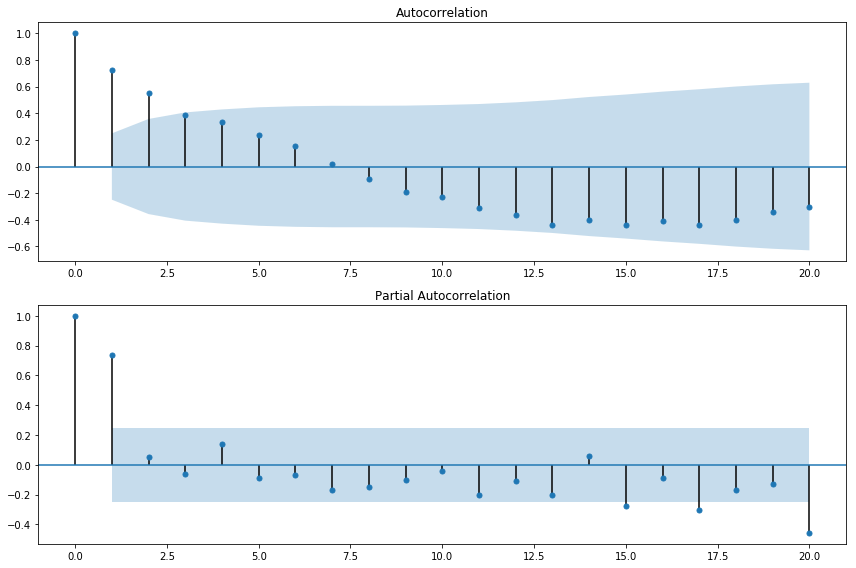

In [14]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()

#### 哈哈，咱们这个数据自相关系数4阶拖尾，偏自相关系数2阶截尾，因此可以选择的是AR(2)模型。

### 4.2 参数估计

通过拖尾和截尾对模型进行定阶的方法，往往具有很强的主观性。回想我们之前在参数预估的时候往往是怎么做的，不就是损失和正则项的加权么？我们这里能不能结合最终的预测误差来确定p，q的阶数呢？在相同的预测误差情况下，根据奥斯卡姆剃刀准则，模型越小是越好的。那么，平衡预测误差和参数个数，我们可以根据信息准则函数法，来确定模型的阶数。预测误差通常用平方误差即残差平方和来表示。

常用的信息准则函数法有下面几种：
#### AIC准则
AIC准则全称为全称是最小化信息量准则（Akaike Information Criterion），计算公式如下：  
AIC = =2 *（模型参数的个数）-2ln（模型的极大似然函数）

#### BIC准则
AIC准则存在一定的不足之处。当样本容量很大时，在AIC准则中拟合误差提供的信息就要受到样本容量的放大，而参数个数的惩罚因子却和样本容量没关系（一直是2），因此当样本容量很大时，使用AIC准则选择的模型不收敛与真实模型，它通常比真实模型所含的未知参数个数要多。BIC（Bayesian InformationCriterion）贝叶斯信息准则弥补了AIC的不足，计算公式如下：

BIC = ln(n) * (模型中参数的个数) - 2ln(模型的极大似然函数值)，n是样本容量

好了，我们通过类似于网格搜索的方式来寻找我们模型最佳的p，q组合吧，这里我们使用BIC进行试验，AIC同理:

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provid

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: invalid value encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/home/ian/installed/anacond

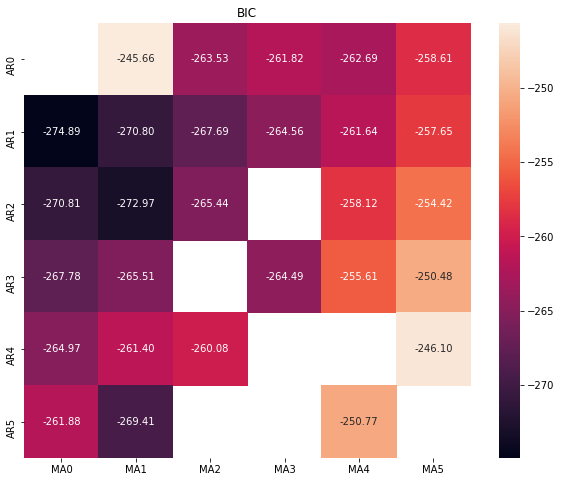

In [15]:
#遍历，寻找适宜的参数
import itertools
import numpy as np
import seaborn as sns

p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5

# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])

for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue

    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.show()

#### 我们上面采用了循环的方式，其实可以用更简单的方法得到p和q的最优值：

In [16]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='nc', max_ar=8, max_ma=8)

print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed,

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provid

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWa

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWa

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWa

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWa

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be

AIC (1, 0)
BIC (1, 0)


/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


表明我们应该选择AR(1)模型。

一般来说，BIC准则得到的ARMA模型的阶数较AIC的低。

### 4.3 模型检验

这里的模型检验主要有两个：  
1）检验参数估计的显著性（t检验）  
2）检验残差序列的随机性，即残差之间是独立的  
残差序列的随机性可以通过自相关函数法来检验，即做残差的自相关函数图：

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<Figure size 864x576 with 0 Axes>

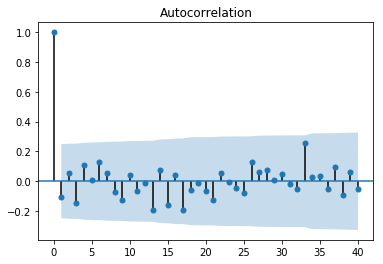

In [17]:
model = sm.tsa.ARIMA(train, order=(1, 0, 0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.show()

#### 这里很明显的检测是通过的。

### 4.4 模型预测

预测主要有两个函数，一个是predict函数，一个是forecast函数，predict中进行预测的时间段必须在我们训练ARIMA模型的数据中，forecast则是对训练数据集末尾下一个时间段的值进行预估。

In [45]:
model = sm.tsa.ARIMA(sub, order=(1, 0, 0))
results = model.fit()
predict_sunspots = results.predict(dynamic=False)
print(predict_sunspots)

Date
2014-01-02    2.588792
2014-01-03    2.608719
2014-01-06    2.561740
2014-01-07    2.533552
2014-01-08    2.524156
2014-01-09    2.514760
2014-01-10    2.505365
2014-01-13    2.495969
2014-01-14    2.524156
2014-01-15    2.514760
2014-01-16    2.514760
2014-01-17    2.505365
2014-01-20    2.486573
2014-01-21    2.477177
2014-01-22    2.477177
2014-01-23    2.514760
2014-01-24    2.486573
2014-01-27    2.495969
2014-01-28    2.486573
2014-01-29    2.495969
2014-01-30    2.533552
2014-01-31    2.514760
2014-02-03    2.514760
2014-02-05    2.514760
2014-02-06    2.514760
2014-02-07    2.514760
2014-02-10    2.495969
2014-02-11    2.514760
2014-02-12    2.552344
2014-02-13    2.542948
                ...   
2014-05-20    2.646302
2014-05-21    2.646302
2014-05-22    2.655698
2014-05-23    2.665094
2014-05-26    2.674489
2014-05-27    2.683885
2014-05-28    2.674489
2014-05-29    2.683885
2014-05-30    2.683885
2014-06-02    2.665094
2014-06-03    2.665094
2014-06-04    2.712073
2014-0

/home/ian/installed/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


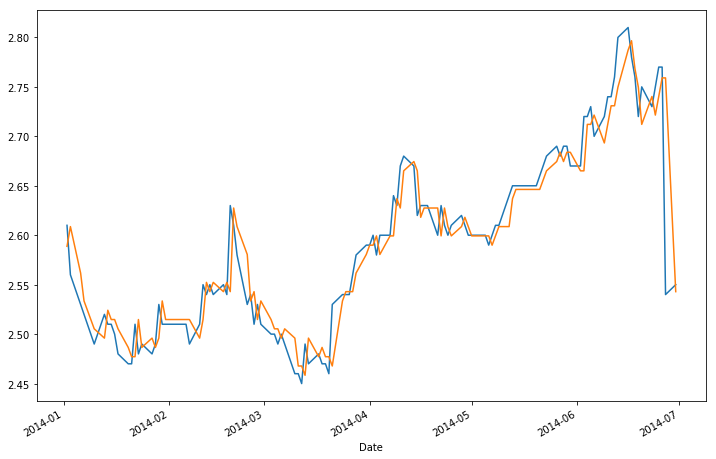

In [47]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sub.plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()

#### 预估下一个值：

In [48]:
results.forecast()

(array([2.55234373]), array([0.02941296]), array([[2.49469539, 2.60999208]]))